# Retail Suite Demo
[![aim2](./assets/aim2.png)](https://www.youtube.com/watch?v=6URZhvByKGg)

### Luca Ruzzola, Machine Learning Engineer @ aim2.io

Retail Suite is **aim2**'s solution for providing detailed KPIs for brand exposure and customer analytics in stores and retail locations.
All of the information processing is done directly on the device where the Suite is installed, leveraging on the edge AI, without ever storing people's photos or videos, or calling external APIs, putting strong emphasis on customer privacy.


In Contextual mode, Retail Suite extracts and tracks demographic and behavioural information such as age, gender and emotional state of the customers, providing valuable information about the context in which the kit is installed. Through the API you can get custom KPIs such as the distribution of the age and gender of customers by day of week of the last month, so that you can get to know your customers better.

### In this hands on session we'll see what kind of KPIs you can easily extract from Retail Suite, a complete AI on the edge solution.

## Setup

In [1]:
import requests
import matplotlib.pyplot as plt
%matplotlib inline

## Get last month aggregation
Get the aggregation on a variable in relation with a dimension, in the last 4 weeks.

In this case, we are asking for the average age of the customers, per gender, in the last 4 weeks.



In [2]:
IP = "http://127.0.0.1:5000"

In [3]:
last_mo_agg = requests.get(IP + "/v1/contextMode/getLastMonthAggregation?dimension=gender&variable=age&aggregation=avg")
last_mo_agg_data = last_mo_agg.json()["data"]
last_mo_agg_data

{'female': 27.304347826086957, 'male': 30.241935483870968}

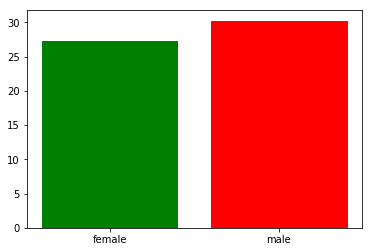

In [4]:
last_mo_age = [elem[1] for elem in last_mo_agg_data.items()]
last_mo_gender = [elem[0] for elem in last_mo_agg_data.items()]
barlist = plt.bar(last_mo_gender, last_mo_age)
barlist[0].set_color('g')
barlist[1].set_color('r')
plt.show()

## Get last hour aggregation
Get the aggregation on a variable in relation with a dimension, in the last hour.

In this case, we are asking for the average focus level of the customers, per age, in the last hour.



In [5]:
last_hh_agg_focus_level = requests.get(IP+"/v1/contextMode/getLastHhAggregation?dimension=age&variable=focus&aggregation=avg")
last_hh_agg_focus_level_data = last_hh_agg_focus_level.json()["data"]
last_hh_agg_focus_level_data

{'27': 1.0,
 '33': 0.855072463768116,
 '38': 0.967741935483871,
 '47': 0.8484848484848485}

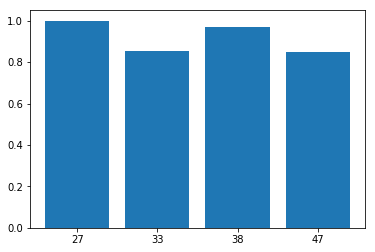

In [6]:
last_hh_age = [elem[0] for elem in last_hh_agg_focus_level_data.items()]
last_hh_focus_level = [elem[1] for elem in last_hh_agg_focus_level_data.items()]
plt.bar(last_hh_age,last_hh_focus_level)
plt.show()

## Get last month distribution
Get the distribution of a variable in relation with a dimension, in the last 4 weeks.

In this case, we are asking for the distribution of the age level with regard to the gender of the customers in the last 4 weeks.


In [7]:
last_mo_dist = requests.get(IP+"/v1/contextMode/getLastMonthDistribution?dimension=gender&variable=emotion")
last_mo_dist_data = last_mo_dist.json()["data"]
last_mo_dist_data

{'female': {'anger': 0.02470694799658994,
  'happy': 0.37707323168412127,
  'neutral': 0.49184168078035617,
  'sad': 0.040819169694005494,
  'surprise': 0.06555896984492726},
 'male': {'anger': 0.2049859490744755,
  'happy': 0.08184392550720462,
  'neutral': 0.4597029495597642,
  'sad': 0.143570789405954,
  'surprise': 0.10989638645260177}}

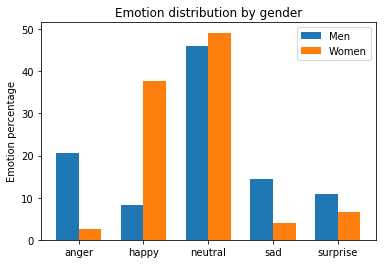

In [8]:
last_mo_emo_perc_male = [float(elem[1]*100) for elem in last_mo_dist_data["male"].items()]
last_mo_emo_perc_female = [float(elem[1]*100) for elem in last_mo_dist_data["female"].items()]
last_mo_emotion = [elem[0] for elem in last_mo_dist_data["male"].items()]

x = [0,1,2,3,4] 
width = 0.35      
plt.bar(x, last_mo_emo_perc_male, width, label='Men')
plt.bar(list(map(lambda xi: xi + width, x)), last_mo_emo_perc_female, width,
    label='Women')

plt.ylabel('Emotion percentage')
plt.title('Emotion distribution by gender')

plt.xticks(list(map(lambda xi: xi + width / 2, x)), ('anger', 'happy', 'neutral', 'sad', 'surprise'))
plt.legend(loc='best')
plt.show()

## Get last hour distribution
Get the distribution of a variable in relation with a dimension, in the last hour.

In this case, we are asking for the distribution of the age level with regard to the gender of the customers in the last hour.


In [9]:
last_hh_distrib = requests.get(IP+"/v1/contextMode/getLastMonthDistribution?dimension=gender&variable=age")
last_hh_distrib_data = last_hh_distrib.json()["data"]
last_hh_distrib_data

{'female': {'23': 0.08695652173913043,
  '24': 0.08695652173913043,
  '25': 0.2608695652173913,
  '26': 0.17391304347826086,
  '27': 0.043478260869565216,
  '28': 0.043478260869565216,
  '29': 0.08695652173913043,
  '30': 0.043478260869565216,
  '33': 0.13043478260869565,
  '38': 0.043478260869565216},
 'male': {'22': 0.03225806451612903,
  '24': 0.06451612903225806,
  '25': 0.03225806451612903,
  '26': 0.08064516129032258,
  '27': 0.16129032258064516,
  '28': 0.08064516129032258,
  '29': 0.14516129032258066,
  '30': 0.08064516129032258,
  '31': 0.04838709677419355,
  '32': 0.016129032258064516,
  '33': 0.06451612903225806,
  '34': 0.03225806451612903,
  '36': 0.03225806451612903,
  '37': 0.03225806451612903,
  '41': 0.03225806451612903,
  '42': 0.03225806451612903,
  '47': 0.016129032258064516,
  '50': 0.016129032258064516}}

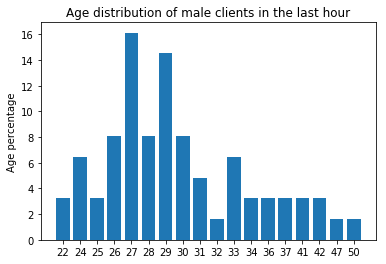

In [10]:
last_hh_age_perc_male = [float(elem[1]*100) for elem in last_hh_distrib_data["male"].items()]
last_hh_age_male = [elem[0] for elem in last_hh_distrib_data["male"].items()]

x = last_hh_age_male 
width = 0.35      
plt.bar(x, last_hh_age_perc_male)

plt.ylabel('Age percentage')
plt.title('Age distribution of male clients in the last hour')

plt.show()

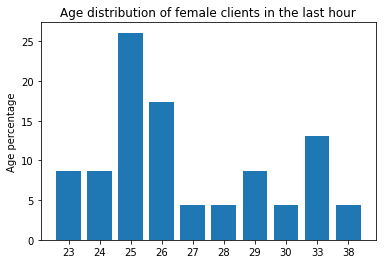

In [11]:
last_hh_age_perc_female = [float(elem[1]*100) for elem in last_hh_distrib_data["female"].items()]
last_hh_age_female = [elem[0] for elem in last_hh_distrib_data["female"].items()]

x = last_hh_age_female 
width = 0.35      
plt.bar(x, last_hh_age_perc_female)

plt.ylabel('Age percentage')
plt.title('Age distribution of female clients in the last hour')

plt.show()

## Get Time Distribution
Get the time distribution of a specific variable in a given time range. Optionally, you can also specify the time binning.

### In this case we are asking for the average age of the customers for day of the week over the month of march.

In [12]:
time_distrib_avg_age = requests.get(IP+"/v1/contextMode/getTimeDistribution?start=01-03-2019&end=31-03-2019&variable=age&aggregation=avg&binning=dow")

In [13]:
time_distrib_avg_age.json()["data"]

{'thursday': 36.25,
 'tuesday': 29.014285714285716,
 'wednesday': 29.727272727272727}

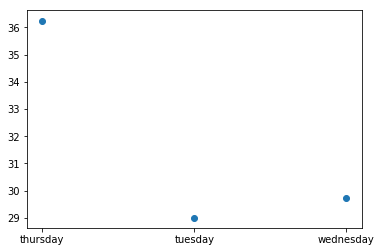

In [14]:
avg_age = [elem[1] for elem in time_distrib_avg_age.json()["data"].items()]
days = [elem[0] for elem in time_distrib_avg_age.json()["data"].items()]
plt.scatter(days,avg_age)
plt.show()

### In this case we are asking for the count of customers for day of the week over the month of march.

In [15]:
time_distrib_count_people_by_day = requests.get(IP+"/v1/contextMode/getTimeDistribution?start=01-03-2019&end=31-03-2019&variable=gender&aggregation=count&binning=dow")

In [16]:
time_distrib_count_people_by_day.json()["data"]

{'thursday': 4, 'tuesday': 70, 'wednesday': 11}

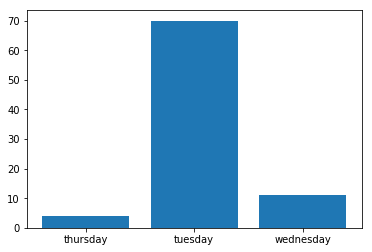

In [17]:
days = [elem[0] for elem in time_distrib_count_people_by_day.json()["data"].items()]
people_count = [elem[1] for elem in time_distrib_count_people_by_day.json()["data"].items()]
plt.bar(days,people_count)
plt.show()

### Distribution of customers emotions over the last month

In [18]:
time_distrib_emotions = requests.get(IP+"/v1/contextMode/getTimeDistribution?start=01-03-2019&end=31-03-2019&variable=emotion&aggregation=avg")
time_distrib_emotions.json()["data"]

{'emotion': {'anger': 0.15620457231222412,
  'happy': 0.16172950247272327,
  'neutral': 0.46839931212533614,
  'sad': 0.11576740995448558,
  'surprise': 0.09789920313523102}}

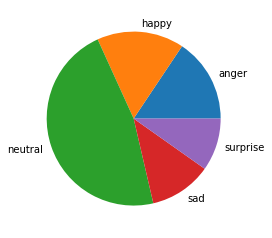

In [19]:
em_perc = [float(elem[1]*100) for elem in time_distrib_emotions.json()["data"]["emotion"].items()]
emotion = [elem[0] for elem in time_distrib_emotions.json()["data"]["emotion"].items()]
plt.pie(em_perc, labels=emotion)
plt.show()